In [1]:
from fastai.vision.all import *
from fastai.vision.widgets import *

In [2]:
DATASET_PATH = Path ('/Users/orion/CAS_771/data1')

In [3]:
# Build the datablock
drowsiness_datablock = DataBlock(
    get_items = get_image_files,
    get_y = parent_label,
    blocks = (ImageBlock, CategoryBlock),
    splitter = GrandparentSplitter(valid_name = 'test') #splitter
)

In [4]:
dls = drowsiness_datablock.dataloaders(DATASET_PATH)

In [5]:
# the model is resnet 152, can change to the different model by change the attribute 
learn = vision_learner(dls, models.resnet152, metrics = accuracy)

/Users/orion/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/orion/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
#show optimizer function
learn.opt_func

<function fastai.optimizer.Adam(params, lr, mom=0.9, sqr_mom=0.99, eps=1e-05, wd=0.01, decouple_wd=True)>

In [7]:
#show loss function
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

SuggestedLRs(valley=0.0030199517495930195)

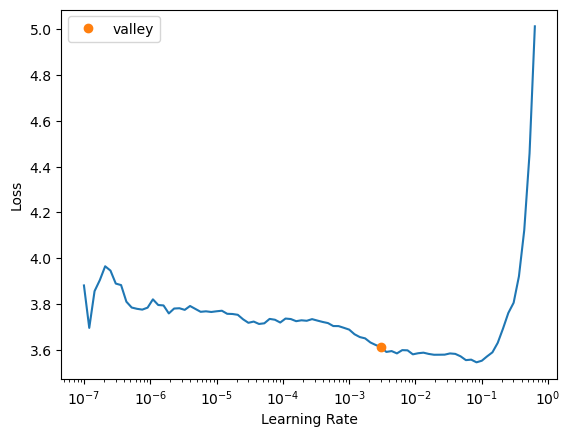

In [8]:
# find the best learning rate
learn.lr_find()

In [9]:
# Train the model
learn.fit_one_cycle(18, 0.0030199517495930195)

epoch,train_loss,valid_loss,accuracy,time
0,2.183799,1.997670,0.339700,10:08
1,1.748129,2.146207,0.438500,10:58
2,1.604899,1.654651,0.473700,10:57
3,1.520955,1.490224,0.501900,10:20
4,1.399912,1.460019,0.532600,09:32
5,1.297051,1.351635,0.531900,14:04
6,1.223743,1.196238,0.577100,09:29
7,1.143685,1.165710,0.592000,09:47
8,1.083717,1.129918,0.598700,09:27
9,1.054278,1.132543,0.603900,09:25


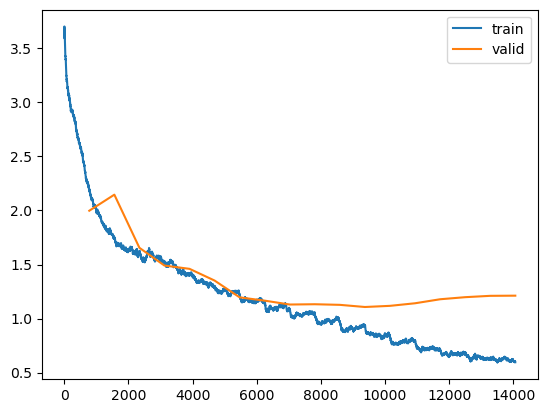

In [10]:
learn.recorder.plot_loss()

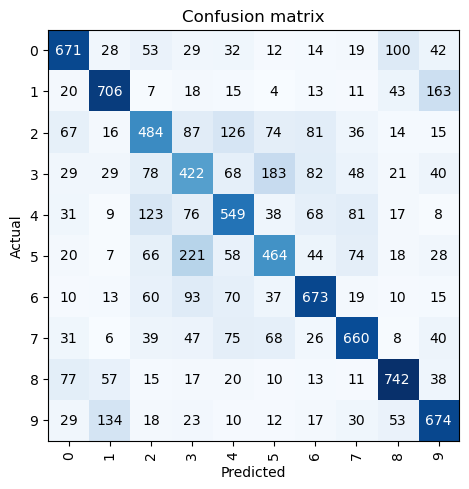

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

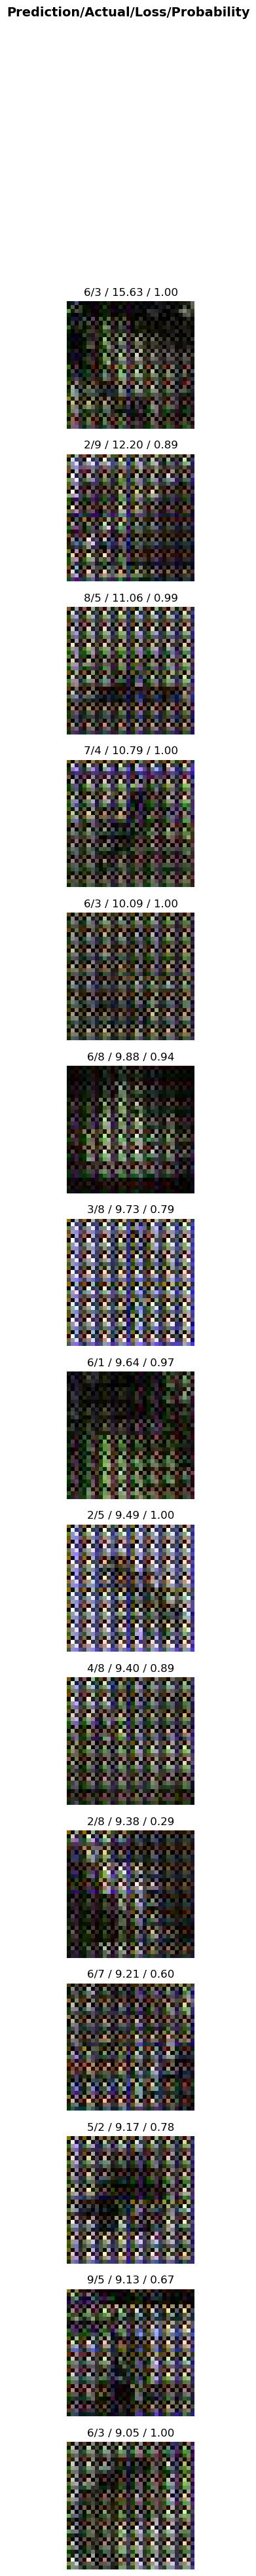

In [12]:
interp.plot_top_losses(15, nrows = 15)

In [13]:
# export the model
learn.export('/Users/orion/CAS_771/models/data1_Resnet152_60.pkl')